<a href="https://colab.research.google.com/github/DanishJameel/Open_source/blob/main/Employee_Attrition_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [ ]:
attrdata = pd.read_csv("/content/Employee_Leave_or_Stay.csv")

In [ ]:
attrdata

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No
5,6,5,Yes,No,Yes,Yes,30,Direct,Male,No,2,Yes
6,7,7,Yes,Yes,Yes,Yes,32,Indirect,Male,Yes,3,Yes
7,8,4,Yes,Yes,Yes,Yes,25,Direct,Female,Yes,3,No
8,9,3,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No
9,10,8,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No


In [ ]:
attrdata.shape

(10, 12)

In [ ]:
attrdata.columns

Index(['job_id', 'Experience ', 'City / out of City', 'Married Status',
       'Promoted or Not ', 'Job Role Match ', 'Age ', 'Hiring  Source ',
       'Gender ', 'Business Trip', 'Salary Package ', 'Stay Leave Status'],
      dtype='object')

In [ ]:
gender_dict = attrdata["Gender "].value_counts()
gender_dict

Female    6
Male      4
Name: Gender , dtype: int64

In [ ]:
#Understanding the balancing of the Gender column visually

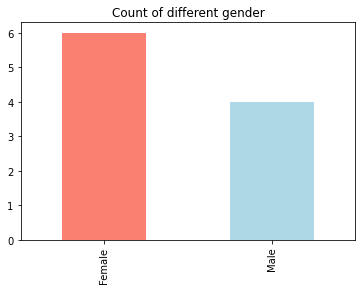

In [ ]:
attrdata['Gender '].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

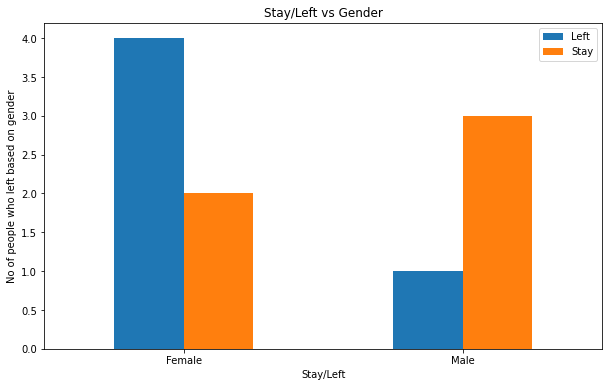

In [ ]:
#Create a plot for crosstab

pd.crosstab(attrdata['Gender '],attrdata['Stay Leave Status']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [ ]:
#Promotion (Promoted/ Non-Promoted)

In [ ]:
promoted_dict = attrdata["Promoted or Not "].value_counts()
promoted_dict

Yes    6
No     4
Name: Promoted or Not , dtype: int64

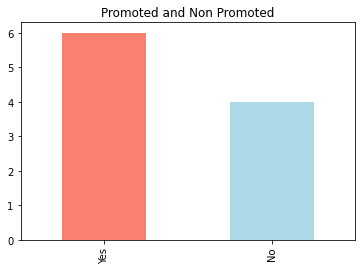

In [ ]:
attrdata['Promoted or Not '].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Promoted and Non Promoted")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

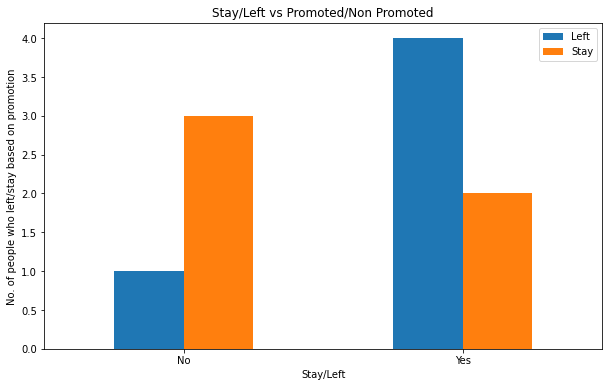

In [ ]:
#Create a plot for crosstab

pd.crosstab(attrdata['Promoted or Not '],attrdata['Stay Leave Status']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Promoted/Non Promoted")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on promotion")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [ ]:
Hiring_dict = attrdata['Hiring  Source '].value_counts()
Hiring_dict

Direct      9
Indirect    1
Name: Hiring  Source , dtype: int64

In [ ]:
Marital_dict = attrdata['Married Status'].value_counts()
print(Marital_dict)

Yes    6
No     4
Name: Married Status, dtype: int64


In [ ]:
job_dict = attrdata['Job Role Match '].value_counts()
job_dict

Yes    6
No     4
Name: Job Role Match , dtype: int64

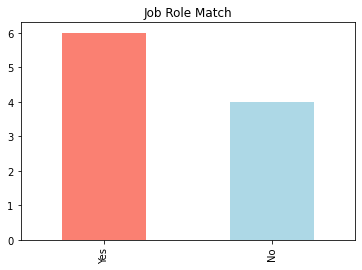

In [ ]:
attrdata['Job Role Match '].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Job Role Match")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

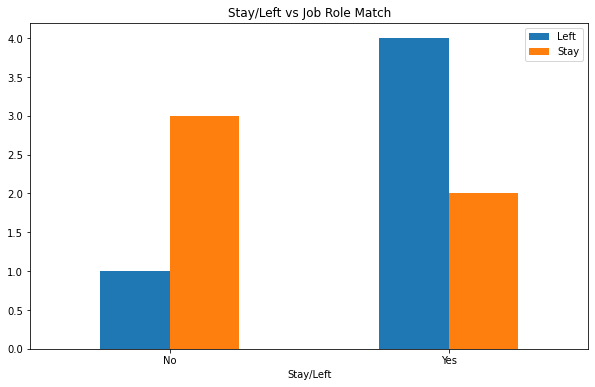

In [ ]:
#Create a plot for crosstab

pd.crosstab(attrdata['Job Role Match '],attrdata['Stay Leave Status']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Job Role Match")
plt.xlabel("Stay/Left")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [ ]:
city_dict = attrdata['City / out of City'].value_counts()
city_dict

Yes    7
No     3
Name: City / out of City, dtype: int64

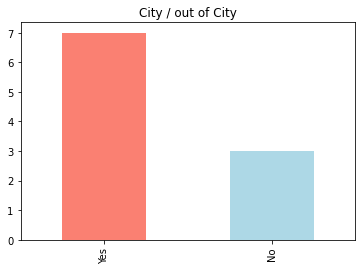

In [ ]:
attrdata['City / out of City'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="City / out of City")

In [ ]:
trip_dict = attrdata['Business Trip'].value_counts()
trip_dict

Yes    6
No     4
Name: Business Trip, dtype: int64

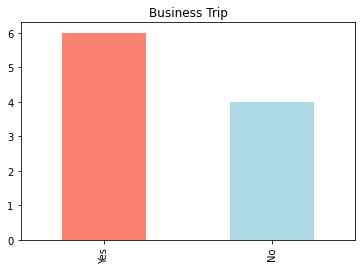

In [ ]:
attrdata['Business Trip'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Business Trip")

In [ ]:
salary_dict = attrdata['Salary Package '].value_counts()
salary_dict

3    5
1    3
2    2
Name: Salary Package , dtype: int64

In [ ]:
status_dict = attrdata['Stay Leave Status'].value_counts()
status_dict

Yes    5
No     5
Name: Stay Leave Status, dtype: int64

In [ ]:
attrdata

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No
5,6,5,Yes,No,Yes,Yes,30,Direct,Male,No,2,Yes
6,7,7,Yes,Yes,Yes,Yes,32,Indirect,Male,Yes,3,Yes
7,8,4,Yes,Yes,Yes,Yes,25,Direct,Female,Yes,3,No
8,9,3,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No
9,10,8,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No


In [ ]:
city = pd.get_dummies(attrdata["City / out of City"])
city.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [ ]:
def city(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = attrdata["City / out of City"].apply(city)
attrdata['City_Status'] = data_l
attrdata.head()

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status,City_Status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes,0
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes,0
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes,0
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No,1


In [ ]:
married = pd.get_dummies(attrdata["Married Status"])
married.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [ ]:
def married(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = attrdata["Married Status"].apply(married)
attrdata['Married_Status'] = data_l
attrdata.head()

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status,City_Status,Married_Status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes,0,0
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes,0,0
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes,0,0
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1,1
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No,1,1


In [ ]:
Promoted = pd.get_dummies(attrdata["Promoted or Not "])
Promoted.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [ ]:
def Promoted(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = attrdata["Promoted or Not "].apply(Promoted)
attrdata['Promotion_Status'] = data_l
attrdata.head()

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status,City_Status,Married_Status,Promotion_Status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes,0,0,0
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes,0,0,0
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes,0,0,0
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1,1,1
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No,1,1,0


In [ ]:
Role = pd.get_dummies(attrdata["Job Role Match "])
Role.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [ ]:
def Role(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = attrdata["Job Role Match "].apply(Role)
attrdata['Job Role Match_Status'] = data_l
attrdata.head()

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status,City_Status,Married_Status,Promotion_Status,Job Role Match_Status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes,0,0,0,0
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes,0,0,0,0
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes,0,0,0,0
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1,1,1,1
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No,1,1,0,0


In [ ]:
Hiring = pd.get_dummies(attrdata['Hiring  Source '])
Hiring.head()

,Direct,Indirect
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
def Hiring(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = attrdata['Hiring  Source '].apply(Hiring)
attrdata['Hiring Source_Status'] = data_l
attrdata.head()

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status,City_Status,Married_Status,Promotion_Status,Job Role Match_Status,Hiring Source_Status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes,0,0,0,0,0
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes,0,0,0,0,0
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes,0,0,0,0,0
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1,1,1,1,0
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No,1,1,0,0,0


In [ ]:
Gender = pd.get_dummies(attrdata["Gender "])
Gender.head()

,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
def Gender(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = attrdata["Gender "].apply(Gender)
attrdata['Gender_status'] = data_l
attrdata.head()

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status,City_Status,Married_Status,Promotion_Status,Job Role Match_Status,Hiring Source_Status,Gender_status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes,0,0,0,0,0,0
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes,0,0,0,0,0,0
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes,0,0,0,0,0,0
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1,1,1,1,0,0
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No,1,1,0,0,0,0


In [ ]:
Trip = pd.get_dummies(attrdata["Business Trip"])
Trip.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [ ]:
def Trip(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = attrdata["Business Trip"].apply(Trip)
attrdata['Business Trip_Status'] = data_l
attrdata.head()

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status,City_Status,Married_Status,Promotion_Status,Job Role Match_Status,Hiring Source_Status,Gender_status,Business Trip_Status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes,0,0,0,0,0,0,0
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes,0,0,0,0,0,0,0
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes,0,0,0,0,0,0,0
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1,1,1,1,0,0,1
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No,1,1,0,0,0,0,1


In [ ]:
Stay = pd.get_dummies(attrdata["Stay Leave Status"])
Stay.head()

,No,Yes
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
def Stay(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = attrdata["Stay Leave Status"].apply(Stay)
attrdata['Stay Leave_Status'] = data_l
attrdata.head()

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status,City_Status,Married_Status,Promotion_Status,Job Role Match_Status,Hiring Source_Status,Gender_status,Business Trip_Status,Stay Leave_Status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes,0,0,0,0,0,0,0,1
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes,0,0,0,0,0,0,0,1
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes,0,0,0,0,0,0,0,1
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1,1,1,1,0,0,1,0
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No,1,1,0,0,0,0,1,0


In [ ]:
attrdata

,job_id,Experience,City / out of City,Married Status,Promoted or Not,Job Role Match,Age,Hiring Source,Gender,Business Trip,Salary Package,Stay Leave Status,City_Status,Married_Status,Promotion_Status,Job Role Match_Status,Hiring Source_Status,Gender_status,Business Trip_Status,Stay Leave_Status
0,1,5,No,No,No,No,20,Direct,Male,No,1,Yes,0,0,0,0,0,0,0,1
1,2,4,No,No,No,No,22,Direct,Female,No,1,Yes,0,0,0,0,0,0,0,1
2,3,7,No,No,No,No,22,Direct,Female,No,2,Yes,0,0,0,0,0,0,0,1
3,4,9,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1,1,1,1,0,0,1,0
4,5,1,Yes,Yes,No,No,24,Direct,Male,Yes,1,No,1,1,0,0,0,0,1,0
5,6,5,Yes,No,Yes,Yes,30,Direct,Male,No,2,Yes,1,0,1,1,0,0,0,1
6,7,7,Yes,Yes,Yes,Yes,32,Indirect,Male,Yes,3,Yes,1,1,1,1,0,0,1,1
7,8,4,Yes,Yes,Yes,Yes,25,Direct,Female,Yes,3,No,1,1,1,1,0,0,1,0
8,9,3,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1,1,1,1,0,0,1,0
9,10,8,Yes,Yes,Yes,Yes,35,Direct,Female,Yes,3,No,1,1,1,1,0,0,1,0


In [ ]:
attrdata.columns

Index(['job_id', 'Experience ', 'City / out of City', 'Married Status',
       'Promoted or Not ', 'Job Role Match ', 'Age ', 'Hiring  Source ',
       'Gender ', 'Business Trip', 'Salary Package ', 'Stay Leave Status',
       'City_Status', 'Married_Status', 'Promotion_Status',
       'Job Role Match_Status', 'Hiring Source_Status', 'Gender_status',
       'Business Trip_Status', 'Stay Leave_Status'],
      dtype='object')

In [ ]:
df = pd.DataFrame(attrdata)

In [ ]:
#attrdata=attrdata.drop(['job_id',  'City / out of City', 'Age ','City_Status', 'Married_Status', 'Promotion_Status','Job Role Match_Status', 'Hiring Source_Status', 'Gender_status','Business Trip_Status', 'Stay Leave_Status'] , axis = 1, inplace=True)

In [ ]:
df=df.drop(['job_id', 'City / out of City', 'Married Status',
       'Promoted or Not ', 'Job Role Match ', 'Hiring  Source ',
       'Gender ', 'Business Trip',  'Stay Leave Status'] , axis=1     )

In [ ]:
df

,Experience,Age,Salary Package,City_Status,Married_Status,Promotion_Status,Job Role Match_Status,Hiring Source_Status,Gender_status,Business Trip_Status,Stay Leave_Status
0,5,20,1,0,0,0,0,0,0,0,1
1,4,22,1,0,0,0,0,0,0,0,1
2,7,22,2,0,0,0,0,0,0,0,1
3,9,35,3,1,1,1,1,0,0,1,0
4,1,24,1,1,1,0,0,0,0,1,0
5,5,30,2,1,0,1,1,0,0,0,1
6,7,32,3,1,1,1,1,0,0,1,1
7,4,25,3,1,1,1,1,0,0,1,0
8,3,35,3,1,1,1,1,0,0,1,0
9,8,35,3,1,1,1,1,0,0,1,0


In [ ]:
gnb.predict([[1,20,0,0,0,0,0,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
dataset = df

In [ ]:
y = dataset["Stay Leave_Status"]
X = dataset.drop("Stay Leave_Status",axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.head()

,Experience,Age,Salary Package,City_Status,Married_Status,Promotion_Status,Job Role Match_Status,Hiring Source_Status,Gender_status,Business Trip_Status
4,1,24,1,1,1,0,0,0,0,1
9,8,35,3,1,1,1,1,0,0,1
2,7,22,2,0,0,0,0,0,0,0
6,7,32,3,1,1,1,1,0,0,1
0,5,20,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [ ]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.875000
[Logistic Regression] test data accuracy is : 0.500000
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 1.000000
[KNN] training data accuracy is : 0.875000
[KNN] test data accuracy is : 0.000000
[SVM] training data accuracy is : 0.875000
[SVM] test data accuracy is : 0.500000
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 1.000000
[Naive Bayes] training data accuracy is : 0.875000
[Naive Bayes] test data accuracy is : 1.000000


In [ ]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.5,
 'KNN classifier': 0.0,
 'Support Vector Machine': 0.5,
 'Random forest': 1.0,
 'Decision tree': 1.0,
 'Naive Bayes': 1.0}

In [ ]:
#Classification Report

In [ ]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.5,0.0,0.5,1.0,1.0,1.0


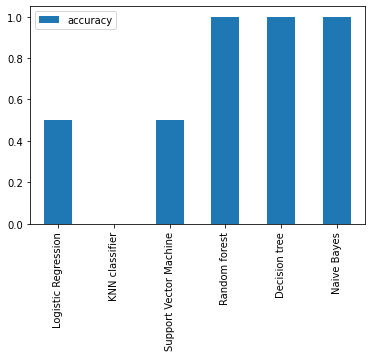

In [ ]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

In [ ]:
# Logistic regression

In [ ]:
feature_dict=dict(zip(dataset.columns,list(lr.coef_[0])))
feature_dict

{'Experience ': 0.19991490457610622,
 'Age ': -0.010948716515526234,
 'Salary Package ': -0.06751828603654457,
 'City_Status': -0.07630756079822928,
 'Married_Status': -0.11628345629077469,
 'Promotion_Status': -0.03665586884769675,
 'Job Role Match_Status': -0.03665586884769675,
 'Hiring Source_Status': 0.0,
 'Gender_status': 0.0,
 'Business Trip_Status': -0.11628345629077469}

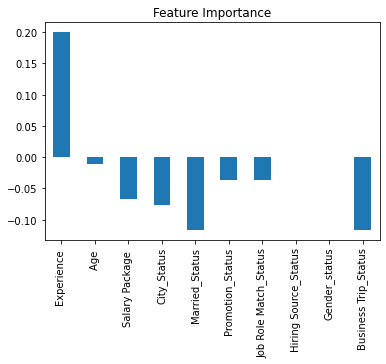

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")


In [ ]:
#Saving the best model


In [ ]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(gnb)

# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
lr_from_pickle.predict(X_test)

array([0, 0])

In [ ]:
gnb.predict([[1,20,3,0,0,0,0,0,0,0]]) # Sample Prediction Using The Best Filt Model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
gnb.predict([[15,30,3,1,1,0,1,1,1,0]]) # Sample Prediction Using The Best Filt Model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
gnb.predict([[1,40,2,1,1,0,1,1,1,0]]) # Sample Prediction Using The Best Filt Model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1])